# Data visualisation lab 1
## Made by: Paulius Lapienis
### Task 1: Choose a  data set (the number of data attributes should be more than 5), explain why it is important or interesting for you.
- Data set link: https://www.kaggle.com/datasets/azathoth42/myanimelist
- The data set is important/interesting because I enjoy watching anime and have been watching it for a long time. I also have an account on the platform, so it's interesting analysing this data, knowing that the data I've put there contributes a very tiny amount in the end result.
- All of the tasks were performed using the Python programming language.
- The features used for the visualisations:
    - episodes: ratio, quantitative
    - studio: nominal, quantitative
    - score: ratio, quantitative
    - source: nominal, quantitative

An excerpt from the data set along with the code can be found below:

In [1]:
from labs.definitions import DATA_DIR
import pandas as pd

DATA_PATH = DATA_DIR / "anime_filtered.csv"
df = pd.read_csv(DATA_PATH)
df

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14469,26089,Gutchonpa Omoshiro Hanashi,NaN,グッチョンパおもしろ話,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Unknown,5,Finished Airing,...,NaN,Fall 1987,Unknown,"{'Other': [{'mal_id': 26087, 'type': 'anime', ...",NaN,NaN,NaN,Kids,[],[]
14470,21525,Geba Geba Shou Time!,NaN,ゲバゲバ笑タイム!,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,1,Finished Airing,...,NaN,NaN,NaN,[],Studio Lotus,NaN,NaN,Comedy,[],[]
14471,37897,Godzilla: Hoshi wo Kuu Mono,NaN,GODZILLA -星を喰う者-,"Godzilla Part 3, Godzilla: Eater of Stars",https://myanimelist.cdn-dena.com/images/anime/...,Movie,Other,1,Not yet aired,...,NaN,NaN,NaN,"{'Prequel': [{'mal_id': 36816, 'type': 'anime'...",NaN,NaN,NaN,"Action, Sci-Fi, Adventure, Fantasy",[],[]
14472,34193,Nippon Mukashibanashi: Sannen Netarou,NaN,日本昔ばなし 三ねん寝太郎,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Other,1,Finished Airing,...,NaN,NaN,NaN,[],NaN,NaN,NaN,"Fantasy, Kids",[],[]


### Task 2: Formulate research questions (for which you expect to find the answers)
#### 1. Does anime with more episodes have higher ratings?

Text(0.5, 1.0, 'Average number of episodes per score')

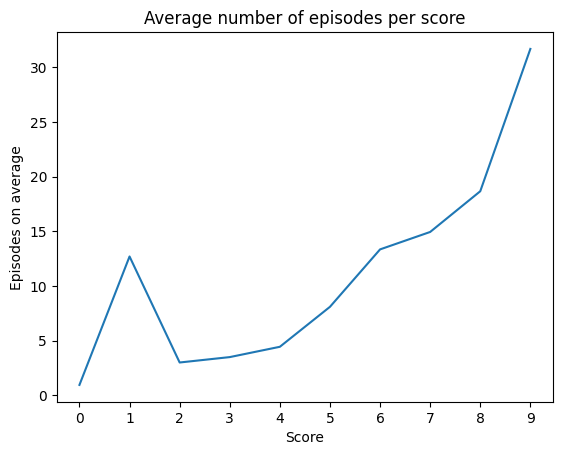

In [2]:
import numpy as np
ax = df.groupby(pd.cut(df["score"], bins=10))["episodes"].mean().plot()
ax.set_xlabel("Score")
ax.set_ylabel("Episodes on average")
ax.set_xticks(np.arange(0, 10, 1))
ax.set_xticklabels(np.arange(0, 10, 1))
ax.set_title("Average number of episodes per score")

As seen in the visualisation, the more episodes an anime has on average, the better it's score is. This is probably due to the fact that longer animes have more time to develop their story and characters, which in turn makes the anime more enjoyable to watch.

#### 2. Does the source material have an impact on the rating?

<Axes: title={'center': 'Average score for source'}, ylabel='source'>

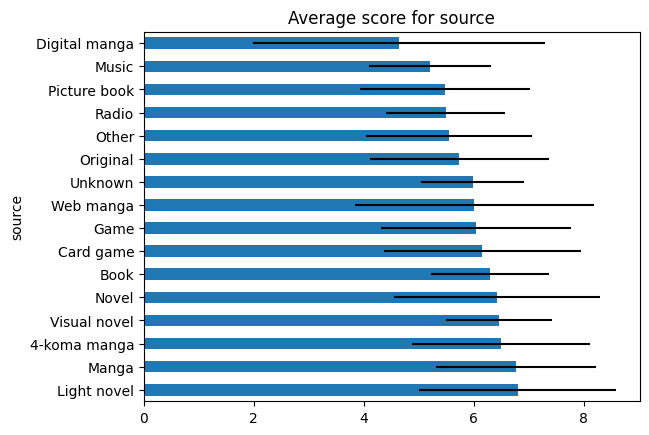

In [3]:
df[["source", "score"]].groupby("source").agg([np.mean, np.std]).sort_values(by=("score", "mean"), ascending=False).plot(kind="barh", y="score", legend=False, title="Average score for source", xerr="std")


No appereant correlation between the source material and the rating. This could be due to the fact that the source material is not always known, thus a lot of anime got filtered out.

#### 3. Which studio produces the best anime on average?

<Axes: title={'center': 'Average score for studio'}, ylabel='studio'>

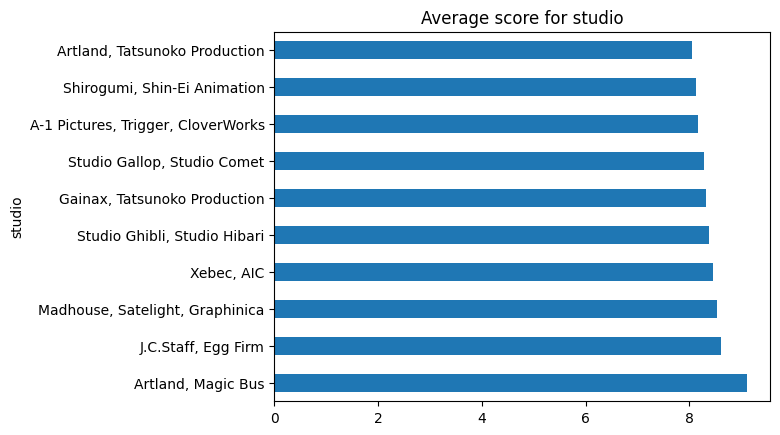

In [4]:
import numpy as np

df[["studio", "score"]].dropna().groupby("studio").agg([np.mean]).sort_values(by=("score", "mean"), ascending=False).head(10).plot(kind="barh", y="score", legend=False, title="Average score for studio")

As seen in the graph, the studio with the highest average rating is Artland.